#Data Preparation

In [ ]:
y = df['booking_complete']
x = df.drop('booking_complete',axis=1)
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62


# Data Splitting

In [ ]:
import pandas as pd

df = pd.read_csv('https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv',encoding='ISO-8859-1')
df


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load data with correct encoding
data_url = 'https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv'
df = pd.read_csv(data_url, encoding='ISO-8859-1')

# Print DataFrame columns to verify column names
print("Columns in DataFrame:", df.columns)

# Define columns to encode
label_encode_cols = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin']
onehot_encode_cols = ['route']

# Verify that all columns exist in the DataFrame
for col in label_encode_cols + onehot_encode_cols:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame. Please check the column names.")

# Label encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# OneHot encoding, ensure the 'route' column exists
if 'route' in df.columns:
    df = pd.get_dummies(df, columns=onehot_encode_cols)
else:
    print("Column 'route' not found in DataFrame. Skipping OneHot encoding for 'route'.")

# Define feature columns and target
feature_columns = df.columns.tolist()
feature_columns.remove('booking_complete')  # Assuming 'flight_duration' is the target
x = df[feature_columns]
y = df['booking_complete']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



Columns in DataFrame: Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


# **Model Building**

### **Linear regression**

**Training** the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**Applying the model to make a prediction**

In [ ]:
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)



**Model** Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train,y_train_predict)
lr_train_r2 = r2_score(y_train,y_train_predict)

lr_test_mse = mean_squared_error(y_test,y_test_predict)
lr_test_r2 = r2_score(y_test,y_test_predict)




0.10613589597427386

# **Random** **Forest**

**Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**Applying the model to make prediction**

In [ ]:
y_rf_train_predict = rf.predict(x_train)
y_rf_test_predict = rf.predict(x_test)


# **Data Visualization of model prediction**

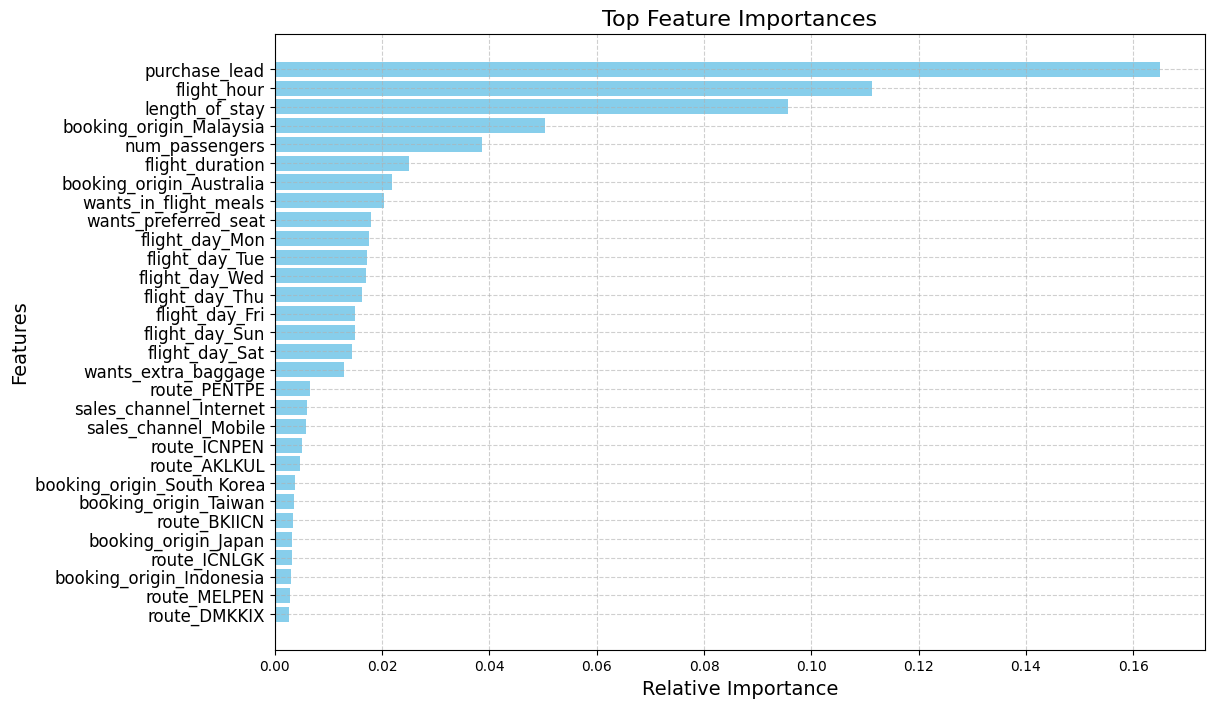

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sample data loading
data_url = 'https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv'
df = pd.read_csv(data_url, encoding='ISO-8859-1')

# Preprocessing: Handle categorical variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
df = pd.get_dummies(df, columns=categorical_columns)

# Define feature columns and target
feature_columns = df.columns.tolist()
feature_columns.remove('booking_complete')  # Assuming 'flight_duration' is the target
X = df[feature_columns]
y = df['booking_complete']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred =
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
print(classification_report(y_test,))
# Number of top features to display
top_n = 30
indices = indices[:top_n]
importances = importances[indices]
feature_names = [feature_columns[i] for i in indices]

# Plot feature importances using a bar chart
plt.figure(figsize=(12, 8))
plt.title('Top Feature Importances', fontsize=16)
plt.barh(range(len(indices)), importances, align='center', color='skyblue')
plt.yticks(range(len(indices)), feature_names, fontsize=12)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
